In [195]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [196]:
#install tensorflow and tensorflow-gpu

In [31]:
!pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 opencv-python matplotlib --user

In [197]:
#now import standard dependencies first

In [198]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [199]:
#now import tensorflow deps

In [200]:

#now import different layer types
#layer for custom layer
#conv2d for cnn
#dense for fully connected layer
#maxpooling for pooling or taking max values of a region
#input for implementing how we input data
#flatten to flatten it into a single dimension
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [201]:
# Model format: Model(inputs=[inputimage, verification image, outputs[1,0]])
#checks if input image is same as output image

In [48]:
#now we set gpu growth


In [38]:
!pip3 install --upgrade pip --user
!pip3 install --upgrade tensorflow --user

In [39]:
!pip3 install --upgrade tensorflow-gpu


In [40]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [41]:
gpus

[]

In [42]:
#no gpu available

In [49]:
#now create folder structure
#setup paths first and then use os library to go and create those directories
#.join connects diff direcs to give a full file path

In [202]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [10]:
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [ ]:
#part2


In [11]:
#untar labelled faces in the wild dataset

In [12]:
#uncompress tar gz labelled faces in the wild dataset
!tar -xf lfw.tgz
# !tar -xf extracts the dataset and places it in the working directory

In [13]:
#move lfw images to data/negative

In [49]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)
    #ex_path is existing path
    #replace grabs from existing path and moves to new path

In [50]:
#now we collect positive and anchor classes using webcam through opencv

In [51]:
#first we ensure whether we can access our webcam or not

In [52]:
# import uuid library to generate unique image names
import uuid

In [53]:
uuid.uuid1()

UUID('1fbf1975-fdc6-11ec-a90e-ac12033aa7fe')

In [54]:
'{}.jpg'.format(uuid.uuid1())

'1fc4e57e-fdc6-11ec-bb8d-ac12033aa7fe.jpg'

In [55]:
os.path.join(ANC_PATH,'{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\1fc840df-fdc6-11ec-8deb-ac12033aa7fe.jpg'

In [56]:
# main code cell for saving webcam frames


# Establish a connection to the webcam and enter device number as the parameter
cap= cv2.VideoCapture(0)

# loop through every single frame in webcam
while cap.isOpened(): # Capture frame-by-frame
    ret, frame = cap.read() #reads the capture at a point in time, upacks and returns the return value and the image(frame)
    
    # cut down size
    frame = frame[150:400, 225:475, :]
    
    # collect anchors by hitting 'a' on the keyboard (wait = 1ms)
    if cv2.waitKey(1) & 0XFF == ord('a'): 
        
        #create a unique file path first
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        
        #write the anchor image
        cv2.imwrite(imgname, frame)
            
    #collect positives by hitting 'p' on the keyboard
    if cv2.waitKey(1) & 0XFF == ord('p'): 
       
    # do same shit as done for anchor
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        
        cv2.imwrite(imgname, frame)
        
    # for rendering the image back to the screen
    cv2.imshow('Image Collection', frame) 
    
    #breaking gracefully
    
    # i choode to wait 1 milisecond and unpack what is being pressed from out keyboard
    if cv2.waitKey(1) & 0XFF == ord('q'): 
        break
    
    #hitting q should close out frame(breaks)

# release the webcam
cap.release() 

# to close the image show frame
cv2.destroyAllWindows() 

KeyboardInterrupt: 

In [ ]:
frame

In [ ]:
plt.imshow(frame)

In [ ]:
plt.imshow(frame[:250, :250, :])

In [ ]:
#now we gotta change the opencv frame size

In [ ]:
#the slicing starts from 0, so it is capturing just the top left corner of out frame

In [ ]:
#rather than strtng from 0 we can start it from, idk

In [ ]:
plt.imshow(frame[150:400, 225:475, :]) #size is to be 250 x 250 (i forgot it is y vs x)

In [ ]:
#the last index would indicate the color channel and by including all we are ensuring that we get a color image

#for eg:

In [ ]:
plt.imshow(frame[150:400, 225:475, :1])

In [ ]:
#now we implement the slicing to the code above

In [ ]:
#now we gotta save the images by collecting anchors and the positives int the main code cell for saving webcam frames

In [ ]:
#first we load image paths into tf.data

In [203]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [204]:
anchor = tf.data.Dataset.list_files(ANC_PATH + '\*.jpg').take(300) #this creates pipeline for all files in a specific directory
positive = tf.data.Dataset.list_files(POS_PATH + '\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH + '\*.jpg').take(300)

In [205]:
#preprocessing-scaling and resizing

In [206]:
#write the preprocess function

In [207]:
def preprocess(file_path):
    
    #read in image from file path as a bytes-like object
    # tf.io: This operation returns a tensor with the entire contents of the input filename.
    # Does not do any parsing, it just returns the contents as they are. Usually, this is the first step in the input pipeline.
    byte_img = tf.io.read_file(file_path) 
    
    #load in image
    img = tf.io.decode_jpeg(byte_img)
    
    #preprocessing steps- resizing the image to 100 x 100 image
    img = tf.image.resize(img, (100,100))
    
    #sacle image to be between 0 and 1
    img = img/255.0
    
    return img
     

In [208]:
# create positive and negative samples


In [209]:
# create using tf.ones arrays with 1 for anchor and positive and 0 for anchor and negative

In [210]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [211]:
tf.ones((len(anchor)))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [212]:
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [213]:
#datatypes in data: string for file path for a sp, second string for a file path to a pos or neg image and the float for veriffication(0 or 1)

In [214]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [215]:
#example

In [216]:
class_labels = tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))

In [217]:
iterator_labs = class_labels.as_numpy_iterator()

In [218]:
iterator_labs.next()

0.0

hence from_tensor_slices converts the parameter into the same format that our anchor and positive/negative are in (which is a tf.data.dataclass)

In [219]:
samples = data.as_numpy_iterator()

In [220]:
example = samples.next()

next, preprocessing the directories

In [221]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [222]:
res = preprocess_twin(*example) # * is to unpack the tuple values

In [223]:
len(res)

3

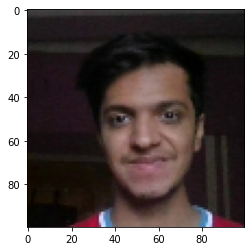

In [224]:
plt.imshow(res[1])

build data pipeline

In [225]:
data = data.map(preprocess_twin) #preprocess_twin for each image
data = data.cache() #caching the images
data = data.shuffle(buffer_size = 1024)

In [226]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [227]:
samples = data.as_numpy_iterator()

In [228]:
len(samples.next())

3

In [229]:
samp = samples.next()

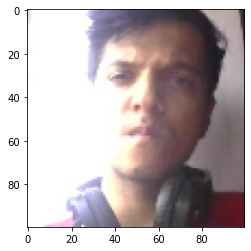

In [230]:
plt.imshow(samp[0])

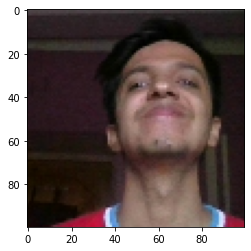

In [231]:
plt.imshow(samp[1])

In [232]:
samp[2]

1.0

In [233]:
samp = samples.next()

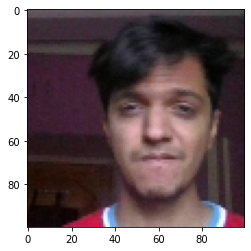

In [234]:
plt.imshow(samp[0])

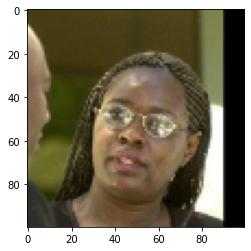

In [235]:
plt.imshow(samp[1])

In [236]:
samp[2]

0.0

gotta create training partition now---

In [237]:
round(len(data)*.7) #to take 70 percent images as our training partition

420

we're considering batches of 16 images at once

data.takes takes the 420 images, same thing as replacing it as 420

prefecth method starts processing next set ogf images to avoid bottleneckng of neural network

In [238]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [239]:
data

<ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

above: none signifies the no of channels which is 0 in anchor and positive

In [240]:
train_samples = train_data.as_numpy_iterator()

In [241]:
train_sample = train_samples.next()

In [242]:
len(train_sample[0]) #no of images inside each sample

16

In [243]:
# create testing partition same wat

In [244]:
test_data = data.skip(round(len(data)*.7)) #skipping first 70 percent as they are training data
test_data = test_data.take(round(len(data)*.3)) #considering the last 30 percent
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

BUILDING EMBEDDING LAYER:

In [245]:
inp = Input(shape=(100,100,3), name = 'input_image')

In [246]:
c1 = Conv2D(64, (10,10), activation = 'relu')(inp)

In [247]:
c1 #shape is pretty close to 96 x 96 pixels and 64 channels as in paper

<KerasTensor: shape=(None, 91, 91, 64) dtype=float32 (created by layer 'conv2d_8')>

In [248]:
m1 = MaxPooling2D(64, (2,2), padding = 'same')(c1)

In [249]:
m1

<KerasTensor: shape=(None, 46, 46, 64) dtype=float32 (created by layer 'max_pooling2d_6')>

# 

In [250]:
c2 = Conv2D(128, (7,7), activation = 'relu')(m1)    
m2 = MaxPooling2D(64, (2,2), padding = 'same')(c2)
c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding = 'same')(c3)
c4 = Conv2D(256, (4,4), activation = 'relu')(m3)
f1 = Flatten()(c4) #flattens
d1 = Dense(4096, activation = 'sigmoid')(f1)

In [251]:
c4

<KerasTensor: shape=(None, 6, 6, 256) dtype=float32 (created by layer 'conv2d_11')>

In [252]:
6*6*256 #shape after flattening c4, single dimension

9216

In [253]:
f1

<KerasTensor: shape=(None, 9216) dtype=float32 (created by layer 'flatten_2')>

In [254]:
d1 #feature vector as mentioned in paper

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'dense_4')>

In [255]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [256]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 20, 20, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 17, 17, 128)       26

In [257]:
def make_embedding():
    inp = Input(shape=(100,100,3), name = 'input_image') #input object of keras

#first block

    #next layer is convolution plus relu activation
    c1 = Conv2D(64, (10,10), activation = 'relu')(inp) # 64 filters as the paper says of 10 x 10 pixels

    #next layer is max pooling layer
    m1 = MaxPooling2D(64, (2,2), padding = 'same')(c1)
    
    #the first two layers form the core block which get replicated a number of times(different sizes obv)
    
    #repeat considering the sizes

#second block

    c2 = Conv2D(128, (7,7), activation = 'relu')(m1)
    
    m2 = MaxPooling2D(64, (2,2), padding = 'same')(c2)
    
#third block

    c3 = Conv2D(128, (4,4), activation = 'relu')(m2)
    
    m3 = MaxPooling2D(64, (2,2), padding = 'same')(c3)
    
# Final embedding block

    c4 = Conv2D(256, (4,4), activation = 'relu')(m3)
    f1 = Flatten()(c4) #flattens
    d1 = Dense(4096, activation = 'sigmoid')(f1) #makes fully connected + sigmoid
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [258]:
embedding = make_embedding()

In [259]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 17, 17, 128)       26

Building custom l1 distance layer:

In [260]:
#undetstanding init and self

In [261]:
class Rectangle:
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length):
        super().__init__(length, length)

Here, you’ve used super() to call the __init__() of the Rectangle class, allowing you to use it in the Square class without repeating code. Below, the core functionality remains after making changes:



In [262]:
square = Square(4)
square.area()


16

In [263]:
#build siamese l1 distance class

class L1Dist(Layer): #Layer is the base class for out keras layers
    
    def _init_(self, **kwargs): #**kwargs allows to work with this specific layer as a part of a bigger model, 
                                #the self variable represents the instance of the object itself.
        super()._init_() #inheritence
    
    # tells what do perform when data is passed-similarity calculation
    def call(self, input_embedding, validation_embedding): # parameters: output of first and second river
        return tf.math.abs(input_embedding - validation_embedding)

In [264]:
l1 = L1Dist()

In [265]:
l1

In [266]:
# combine embedding layer, l1 distance model

In [267]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))
    

In [268]:
val = embedding(validation_image)

In [269]:
inp = embedding(input_image)

In [270]:
inp

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [271]:
val

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'embedding')>

In [272]:
siamese_layer = L1Dist()

In [273]:
distances = siamese_layer(inp, val)

In [274]:
#4096 reprensents distances between input and validation embedding

In [275]:
classifier = Dense(1, activation = 'sigmoid')(distances)

In [276]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_6')>

make a function now

In [277]:
SiameseNetwork = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [278]:
SiameseNetwork.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['validation_img[0][0]',         
                                                                  'input_img[0][0]'] 

In [279]:
def make_siamese_model():
    
    #handle input here
    
    #anchor image input
    input_image = Input(name='input_img', shape=(100,100,3))
    
    #validation image input
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    #pass inputs to embedding layer
    #combine components
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    #final component is to check if the embeddings are similar enough
    
    #classification layer
    classifier = Dense(1, activation = 'sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [280]:
siamese_model = make_siamese_model()

In [281]:
siamese_model

In [282]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

The beginning of training the model

Setting up loss and optimizer(for back propagation)


In [283]:
binary_cross_loss = tf.losses.BinaryCrossentropy() #BinaryCrossentropy(from_logits = True) is recommended when the inputs to the loss function are not normalized

In [284]:
opt = tf.keras.optimizers.Adam(1e-4) #setting learning rate to 0.0001

Establishing checkpoints

In [285]:
checkpoint_dir = './training_checkpoints' #going to the tra..che.. folder form the current folder

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt') # all checkpoints should start with 'ckpt'

checkpoint = tf.train.Checkpoint(opt = opt, siamese_model = siamese_model) # save the components is our et of checkpoints

In [286]:
# to re-load from the checkpoint model.load('path_to_checkpoint') can be used. This will load the pre trained weights into the existing model.

Build training step (which is to be used to train on one batch of data)

Basic flow for training one batch:
    
    1. Make a prediction
    2. Calculate loss
    3. Derive gradients
    4. Calculate new weights and apply

Each batch here is comprised of 16 sampes each of which contains an anchor image, a positive or negative image and a label

In [287]:
test_batch = train_data.as_numpy_iterator()

In [288]:
batch_1 = test_batch.next()

In [289]:
len(batch_1)

3

In [290]:
batch_1[0] #this is the representation of our ancor image and should have the same shape as the number of images in our batch (16 here)

array([[[[2.86519617e-01, 2.55147070e-01, 2.98284322e-01],
         [2.96323538e-01, 2.57107854e-01, 2.91421562e-01],
         [2.99754888e-01, 2.63480395e-01, 2.86029398e-01],
         ...,
         [2.17892155e-01, 2.17892155e-01, 2.23774508e-01],
         [2.12745100e-01, 2.12745100e-01, 2.12745100e-01],
         [2.10784316e-01, 2.10784316e-01, 2.10784316e-01]],

        [[2.67892152e-01, 2.40441173e-01, 2.71813720e-01],
         [2.78186262e-01, 2.41176471e-01, 2.71813720e-01],
         [2.81127453e-01, 2.45098040e-01, 2.66911775e-01],
         ...,
         [1.45833328e-01, 1.52205884e-01, 1.49019614e-01],
         [1.47549018e-01, 1.49509802e-01, 1.48529410e-01],
         [1.33578435e-01, 1.35539219e-01, 1.34558827e-01]],

        [[2.50490189e-01, 2.23039210e-01, 2.50735283e-01],
         [2.48039216e-01, 2.20833331e-01, 2.39705876e-01],
         [2.58333325e-01, 2.18627453e-01, 2.36029416e-01],
         ...,
         [8.97058845e-02, 9.75490212e-02, 8.92156884e-02],
         [

In [291]:
len(batch_1[0])

16

In [292]:
batch_1[2] #labels

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [293]:
X = batch_1[:2]

In [294]:
np.array(X).shape # two components that is anchor and positive and negative images of 100 x 100 x 3 size

(2, 16, 100, 100, 3)

In [295]:
y = batch_1[2]

In [296]:
y

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
      dtype=float32)

In [297]:
@tf.function #wrapping the function into the @tf.function decorator
# this compiles a function into a callable tensorflow graph
# building a training step function outside of a compiled model needs to have this decorator!

def train_step(batch):
    
    #Record all operations
    with tf.GradientTape() as tape: #this allows capturing of our gradients from our neural network model
    # or records operations for automatic differentiation
    
        # Get anchor and positive/negative image
        X = batch[:2]
    
        #Get label
        y = batch[2] #this is y true
        
        #Forward pass (get y predicted)
        yhat = siamese_model(X, training = True) #making a prediction, certain layers activate only when training =True
        
        #Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
    
    # Calculate gradients
    #tape.gradient strats to use a tape that recorded all of our operations through our neural network to go and calculate our gradient
    grad = tape.gradient(loss, siamese_model.trainable_variables) # directs to calculate all of our gradients w.r.t. the loss provided for all of our trainable variables
    
    # Calculate updated weights and apply to siamese model
    # the next line basically directs the optimizer to apply our learning rate and slightly reducing the loss by changing our weights to be closer to the global optima
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    return loss

Building training loop:

In [298]:
# the loops inside weill be used to iterate over every batch in the dataset
def train(data, EPOCHS):
    
    #Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
    
        #Loop through each batch
        for idx, batch in enumerate(data): #gives us a counter and the actual batch itself
            
            #run train step here
            train_step(batch)
            progbar.update(idx+1)
            
            # Save checkpoints
            if epoch%10 == 0:
                checkpoint.save(file_prefix = checkpoint_prefix)

FINALLY, TRAIN THE MODEL:

In [103]:
EPOCHS = 30

In [104]:
train(train_data, EPOCHS)


 Epoch 1/30
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 1099s 41s/step

 Epoch 2/30
27/27 [==============================] - 1275s 47s/step

 Epoch 3/30
27/27 [==============================] - 1140s 42s/step

 Epoch 4/30
27/27 [==============================] - 1224s 45s/step

 Epoch 5/30
27/27 [==============================] - 1014s 37s/step

 Epoch 6/30
27/27 [==============================] - 840s 31s/step

 Epoch 7/30
27/27 [==============================] - 751s 28s/step

 Epoch 8/30
27/27 [==============================] - 767s 28s/step

 Epoch 9/30
27/27 [==============================] - 775s 29s/step

 Epoch 10/30
27/27 [==============================] - 823s 31s/step

 Epoch 11/30
27/27 [==============================] - 764s 28s/step

 Epoch 12/30
27/27 [==============================] - 789s 29s/step

 Epoch 13/30
27/27 [=

In [299]:
# LOSS IS NOT PRINTED, WE MIGHT NEED EAGER EXECUTION SET FOR THAT

EVALUATE MODEL:

Metrics to be used: precision and recall

In [300]:
#Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [301]:
# format: set up the metric, update its state and calculate the result

Precision: demonstrates what proportion of positive identifications were actually correct.

Recall: shows what proportion of actual positives were identified correctly.

In [302]:
#Get data batches

In [303]:
test_data

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None, 100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [304]:
test_var = test_data.as_numpy_iterator().next()

In [305]:
len(test_var)

3

In [306]:
len(test_var[0]) # length of test input

16

In [307]:
len(test_var[1]) # length of validation data

16

In [308]:
test_var[2] # classification label

array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.],
      dtype=float32)

In [309]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [310]:
# Make predictions:

In [311]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 [==============================] - 3s 3s/step


array([[0.49853906],
       [0.49868375],
       [0.49907434],
       [0.49863854],
       [0.49898073],
       [0.4977835 ],
       [0.49970573],
       [0.49672675],
       [0.4974943 ],
       [0.49896118],
       [0.49910656],
       [0.4995277 ],
       [0.49842027],
       [0.4964657 ],
       [0.50002664],
       [0.49972582]], dtype=float32)

In [312]:
# Post processing the result:

In [313]:
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [314]:
y_true

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1.],
      dtype=float32)

In [315]:
# Create metric object for recall
m = Recall()

# calculating recall value
m.update_state(y_true, y_hat)

# return recall result
m.result().numpy()

0.14285715

In [316]:
# Create metric object for precision
m = Precision()

# calculating recall value
m.update_state(y_true, y_hat)

# return recall result
m.result().numpy()

1.0

Visualising the results:

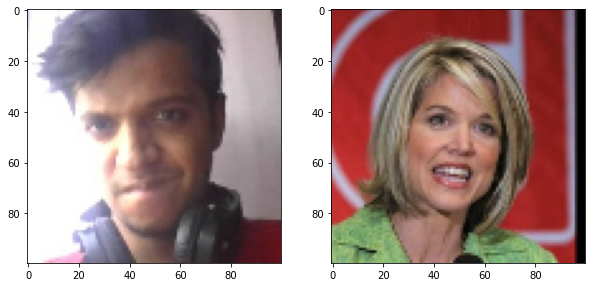

In [317]:
# Set plot size
plt.figure(figsize = (10, 8))

# Subplot format: first parameter: no of rows, second parameter: no of columns, third parameter: index

# Set first sub plot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second sub plot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

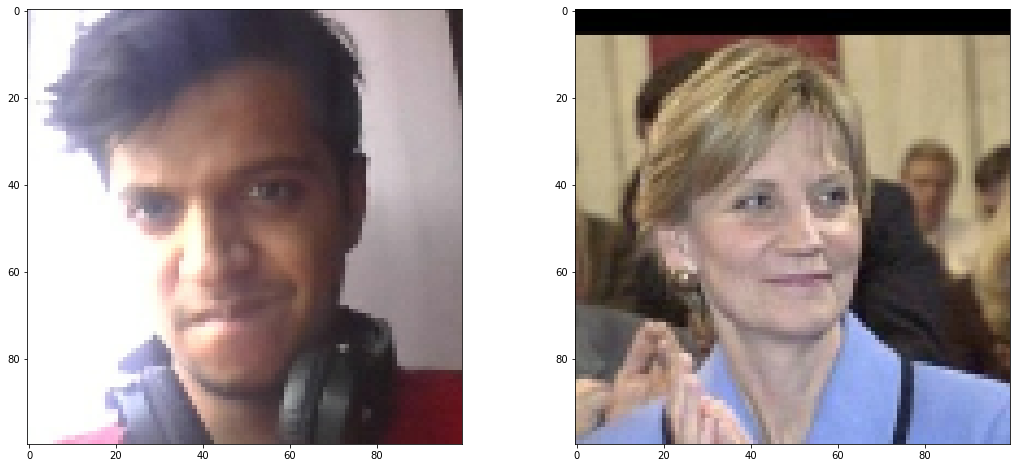

In [318]:
plt.figure(figsize = (18, 8))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

SAVING THE MODEL:

In [319]:
# Saving the weights:

siamese_model.save('siamesemodel.h5')

In [320]:
# reload the model

model = tf.keras.models.load_model('siamesemodel.h5', custom_objects = {'L1Dist': L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy})

In [321]:
# Make predictions with reloaded model
model.predict([test_input, test_val])

1/1 [==============================] - 3s 3s/step


array([[0.49853906],
       [0.49868375],
       [0.49907434],
       [0.49863854],
       [0.49898073],
       [0.4977835 ],
       [0.49970573],
       [0.49672675],
       [0.4974943 ],
       [0.49896118],
       [0.49910656],
       [0.4995277 ],
       [0.49842027],
       [0.4964657 ],
       [0.50002664],
       [0.49972582]], dtype=float32)

In [322]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

REAL TIME TEST-----

In [323]:
# Verification function:

In [324]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified
        

OpenCV Real Time Verification

In [341]:
# Same loop format as used for capturing anchor and positive images

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(model, 0.45, 0.3)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 347ms/step
False


In [340]:
results

[array([[0.49907687]], dtype=float32),
 array([[0.49953032]], dtype=float32),
 array([[0.49974033]], dtype=float32),
 array([[0.49915418]], dtype=float32),
 array([[0.4987222]], dtype=float32),
 array([[0.4987477]], dtype=float32),
 array([[0.49851686]], dtype=float32),
 array([[0.49962938]], dtype=float32),
 array([[0.49934277]], dtype=float32),
 array([[0.49977124]], dtype=float32),
 array([[0.49977124]], dtype=float32),
 array([[0.49898714]], dtype=float32),
 array([[0.49924895]], dtype=float32),
 array([[0.49915132]], dtype=float32),
 array([[0.49911782]], dtype=float32),
 array([[0.4984116]], dtype=float32),
 array([[0.49853337]], dtype=float32),
 array([[0.4980558]], dtype=float32),
 array([[0.49991223]], dtype=float32),
 array([[0.49910718]], dtype=float32),
 array([[0.49949116]], dtype=float32),
 array([[0.4983468]], dtype=float32),
 array([[0.4975087]], dtype=float32),
 array([[0.49745458]], dtype=float32),
 array([[0.49933502]], dtype=float32),
 array([[0.49912414]], dtype=fl

In [336]:
np.sum(np.squeeze(results)>0.5)

21